# Question 1

In [114]:
# libraries
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

## Download the data

In [115]:
indicators = {
    'EN.ATM.CO2E.KT': 'CO2 emissions (kt)',          # Emisiones de CO2
    'NY.GDP.MKTP.CD': 'GDP (current US$)',            # PIB en dólares corrientes
    'SP.POP.TOTL': 'Population',                      # Población total
    'EG.USE.PCAP.KG.OE': 'Energy use (kg of oil equivalent per capita)', # Consumo de energía per cápita
    'SE.PRM.ENRR': 'School enrollment, primary (% gross)', # Tasa de matriculación en educación primaria
    'IQ.CPA.ENVR.XQ':"CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)",
    'SP.POP.GROW':'Population growth (annual %)',
    'SL.IND.EMPL.ZS': 'Employment in industry (% of total employment) (modeled ILO estimate)'
}
df=wb.data.DataFrame(indicators, mrnev=1, labels = True)
df=df.drop(df.index[[i for i in range(48)]])

In [116]:
df.set_index('Country', inplace=True)
df=df.rename(columns=indicators)

## Getting the data information

In [117]:
print(df.info()) #describe el tipo de dato de cada columna
print(df.describe()) #resumen estadistico
print(df.isnull().sum()) #muestra el total de valores nulos
print(df.duplicated().sum()) #Filas duplicadas

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Afghanistan to Gibraltar
Data columns (total 8 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Energy use (kg of oil equivalent per capita)                                            173 non-null    float64
 1   CO2 emissions (kt)                                                                      191 non-null    float64
 2   CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)  87 non-null     float64
 3   GDP (current US$)                                                                       214 non-null    float64
 4   School enrollment, primary (% gross)                                                    209 non-null    float64
 5   Employment in industry (% of total employment) (modeled ILO e

## Using K near neighbors to substitute NaN-values

In [118]:
imputer = KNNImputer(n_neighbors=2)

imputed_array = imputer.fit_transform(df)
df= pd.DataFrame(imputed_array, columns=df.columns, index=df.index)
df.head()
df.to_csv('co2_emissions.csv')

### Looking for the NaN-values to verify the algorithim

In [119]:
df.isnull().sum()

Energy use (kg of oil equivalent per capita)                                              0
CO2 emissions (kt)                                                                        0
CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)    0
GDP (current US$)                                                                         0
School enrollment, primary (% gross)                                                      0
Employment in industry (% of total employment) (modeled ILO estimate)                     0
Population growth (annual %)                                                              0
Population                                                                                0
dtype: int64

# Correlations between columns

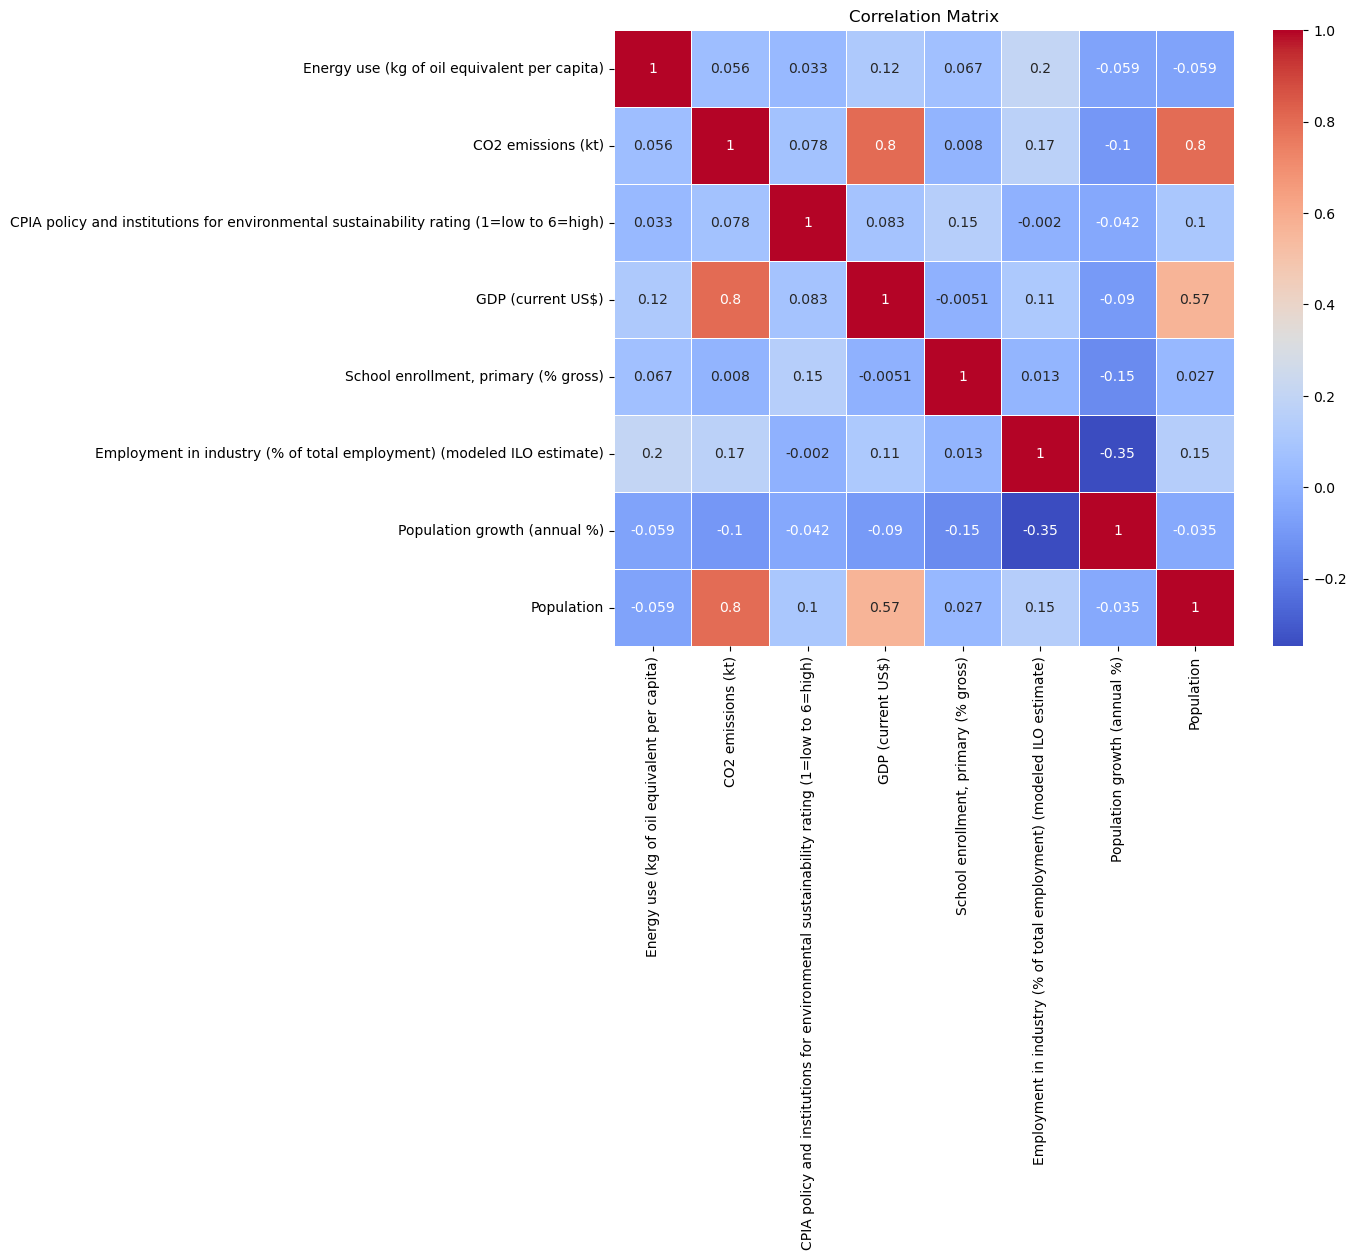

In [120]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("correlation.png", bbox_inches='tight')
plt.show()